<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/10_Intro_to_ANN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### *An ANN is a Machine Learning model inspired by the networks of biological neurons found in our brains.*

# Biological Neurons

Before we discuss artificial neurons, let’s take a quick look at a biological neuron (represented in Figure 10-1). It is an unusual-looking cell mostly found in animal brains. It’s composed of a cell body containing the nucleus and most of the cell’s complex components, many branching extensions
called dendrites, plus one very long extension called the axon.

The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called
telodendria, and at the tip of these branches are minuscule structures called synaptic terminals (or simply synapses), which are connected to the dendrites or cell bodies of other
neurons. Biological neurons produce short electrical
impulses called action potentials (APs, or just signals) which travel along the axons and make the synapses release chemical signals called  neurotransmitters. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of
them inhibit the neuron from firing).


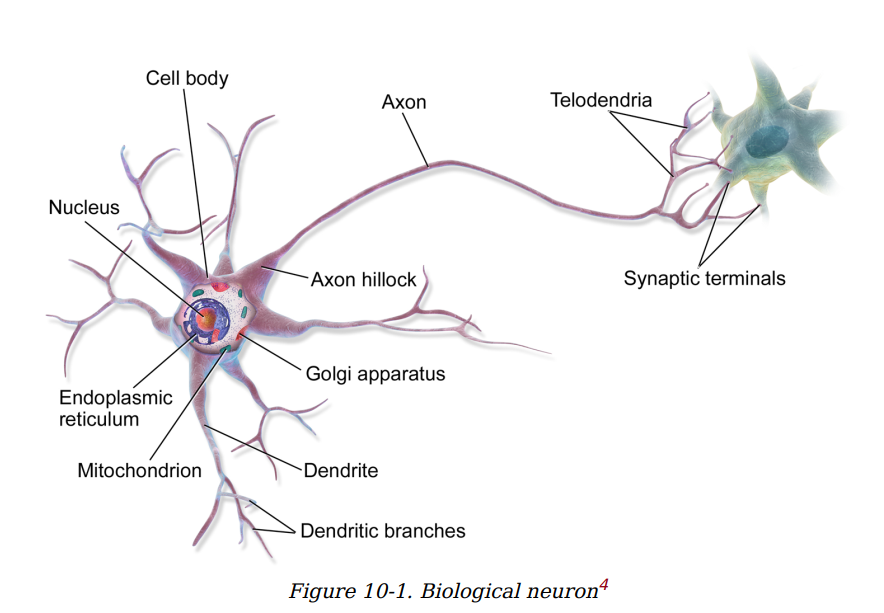

# Logical Computations with Neurons
McCulloch and Pitts proposed a very simple model of the
biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active.

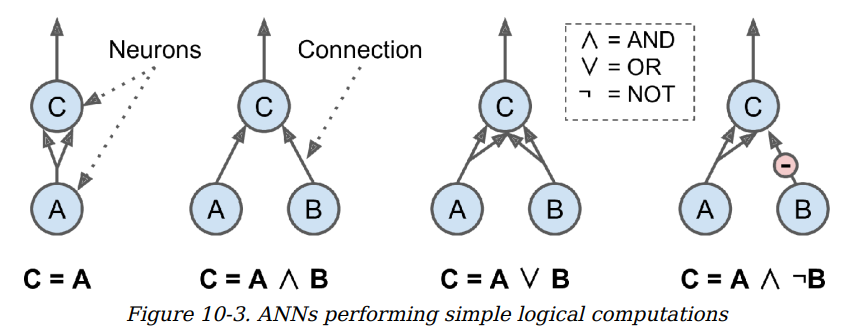

Let’s see what these networks do:

1. The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.
2. The second network performs a logical AND: neuron C is activated only when both neurons A and B are
activated (a single input signal is not enough to
activate neuron C).
3. The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
4. Finally, if we suppose that an input connection can
inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off,
and vice versa.

# The Perceptron
The Perceptron is one of the simplest ANN architectures,
invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (see Figure 10-4) called a **threshold logic unit (TLU)**, or sometimes a **linear threshold unit (LTU)**.
The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $(z =
w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$, then applies a stepfunction to that sum and outputs the result: $h(x) = step(z)$,
where $z = x^T w$.

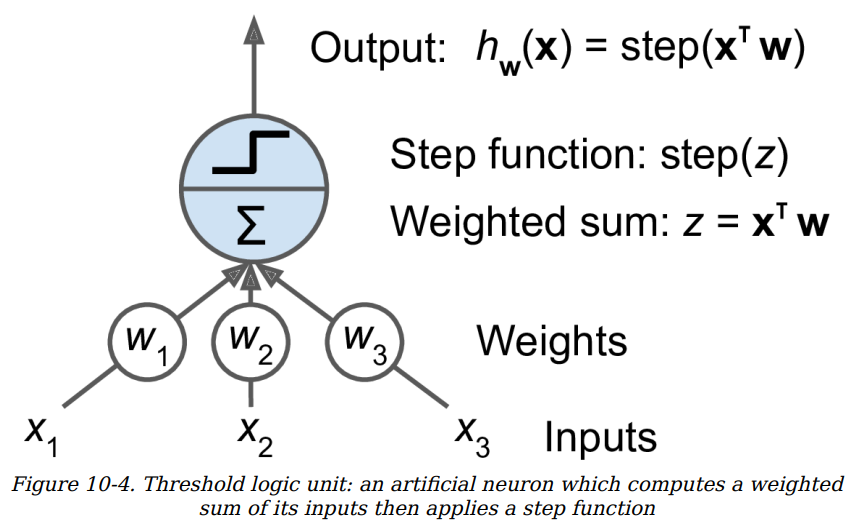

A single TLU can be used for simple linear binary
classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a Logistic Regression or linear SVM classifier).

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the
neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a dense layer. The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x = 1): it is typically represented using a special type of neuron called a bias
neuron, which outputs 1 all the time.

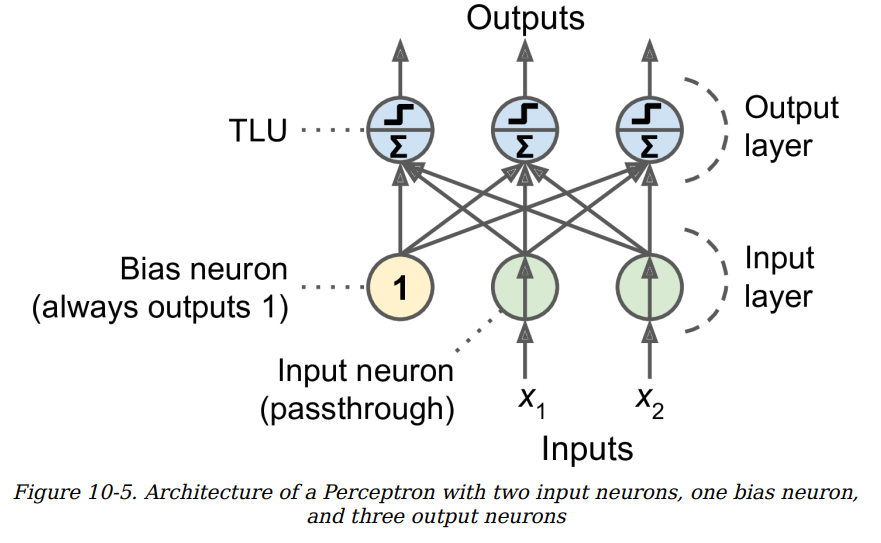

$h_w,_b = \phi(XW + b)$

1. As always, X represents the matrix of input features. It has one row per instance and one column per feature.
2. The weight matrix W contains all the connection
weights except for the ones from the bias neuron. It
has one row per input neuron and one column per
artificial neuron in the layer.
3. The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
4. The function ϕ is called the activation function: when
the artificial neurons are TLUs, it is a step function
(but we will discuss other activation functions shortly).

## Perceptron learning rule (weight update)

$w_i,_j(next step) = w_i,_j + η (y_j − \hat{y}_j) xi$

In this equation:
1. $w_i,_j$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
2. $x_i$ is the $i^{th}$ input value of the current training instance.
3. $\hat{y_j}$ is the output of the $j^{th}$ output neuron for the current training instance.
4. $y_j$ is the target output of the $j^{th}$ output neuron for the
current training instance.
5. η is the learning rate.

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just
like Logistic Regression classifiers).

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # Petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris Setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
print("Setosa") if per_clf.predict([[2, 0.5]]) else print("Not Setosa")

Not Setosa


You may have noticed that the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters:
loss="perceptron", learning_rate="constant", eta0=1 (the learning
rate), and penalty=None (no regularization).

**Perceptrons do not output a class probability.**

It turns out that some of the limitations of Perceptrons can be
eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multilayer Perceptron (MLP). An MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right side of Figure 10-6: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown.

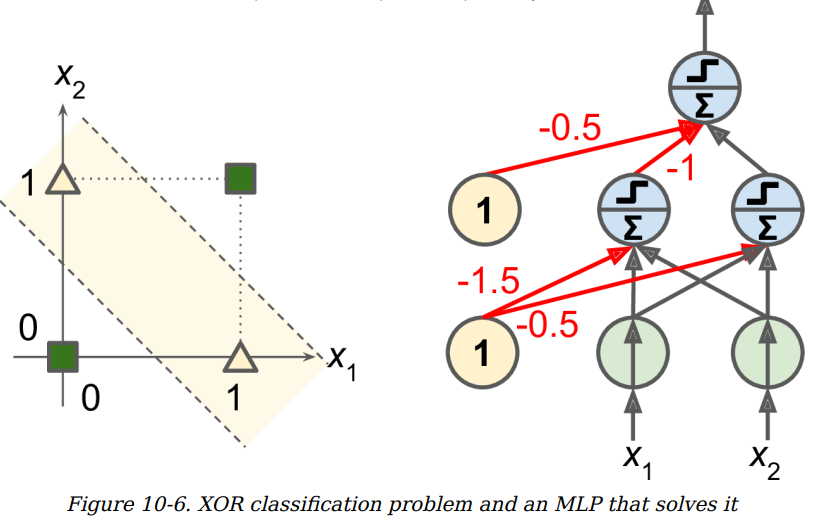

# The Multilayer Perceptron and Backpropagation
An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer (see Figure 10-7). The layers
close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upperlayers. Every layer except the output layer includes a bias
neuron and is fully connected to the next layer.

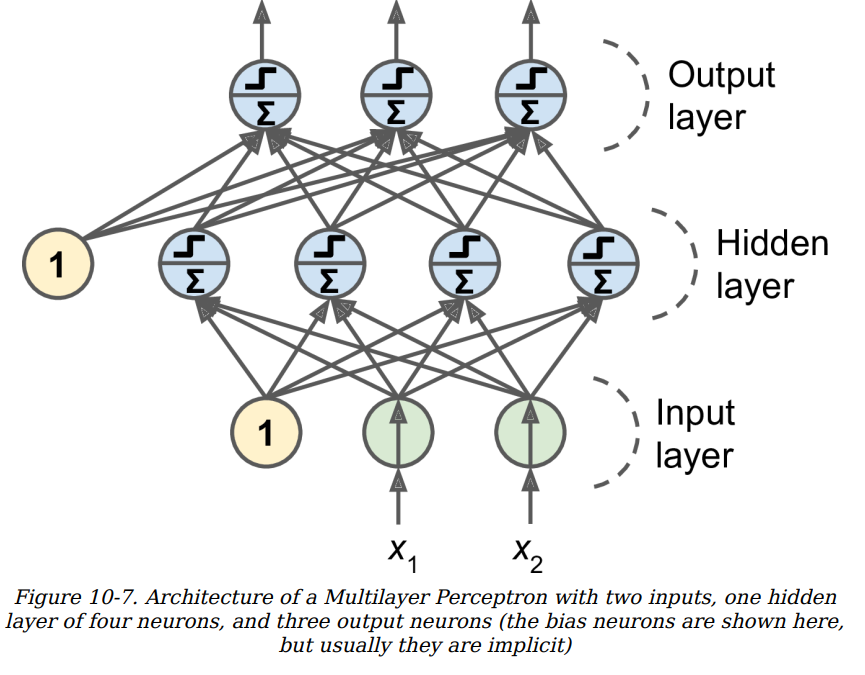

When an ANN contains a deep stack of hidden layers, it is
called a deep neural network (DNN).

The backpropagation
training algorithm is like
Gradient Descent (introduced in Chapter 4) using an  efficient technique for computing the gradients automatically: in just
two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the
gradient of the network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the
solution.

*Automatically computing gradients is called  **automatic differentiation**, or
**autodiff**. There are various autodiff techniques, with different pros and
cons. The one used by  backpropagation is called reverse-mode autodiff.
It is fast and precise, and is well suited when the function to differentiate has many variables (e.g., connection weights) and few
outputs (e.g., one loss).*

Let’s run through this algorithm in a bit more detail:
1. It handles one mini-batch at a time (for example,
containing 32 instances each), and it goes through the
full training set multiple times. Each pass is called an
epoch.
2. Each mini-batch is passed to the network’s input layer,
which sends it to the first hidden layer. The algorithm
then computes the output of all the neurons in this
layer (for every instance in the mini-batch). The result
is passed on to the next layer, its output is computed
and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
3. Next, the algorithm measures the network’s output
error (i.e., it uses a loss function that compares the
desired output and the actual output of the network,
and returns some measure of the error).
4. Then it computes how much each output connection
contributed to the error. This is done analytically by
applying the chain rule (perhaps the most fundamental
rule in calculus), which makes this step fast and
precise.
5. The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward
until the algorithm reaches the input layer. As
explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
6. Finally, the algorithm performs a Gradient Descent
step to tweak all the connection weights in the
network, using the error gradients it just computed.

*It is important to initialize all the hidden layers’ connection weights
randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly
the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart.*

It is important to initialize all the hidden layers’ connection weights
randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly
the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. 

1. The hyperbolic tangent function: $tanh(z) = 2σ(2z) – 1$,  its output value
ranges from –1 to 1.

2. The Rectified Linear Unit function: $ReLU(z) = max(0, z)$, The ReLU function is continuous but unfortunately not differentiable at z = 0.

#### Why do we need activation functions in the first place? 
Well, if you chain several linear transformations, all you get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1$. So if you
don’t have some nonlinearity between layers, then even a
deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

# Regression MLPs
In general, when building an MLP for regression, you do not
want to use any activation function for the output neurons, so
they are free to output any range of values. If you want to
guarantee that the output will always be positive, then you
can use the ReLU activation function in the output layer.
Alternatively, you can use the softplus activation function,
which is a smooth variant of ReLU: softplus(z) = log(1 +
exp(z)). It is close to 0 when z is negative, and close to z when
z is positive. Finally, if you want to guarantee that the
predictions will fall within a given range of values, then you
can use the logistic function or the hyperbolic tangent, and
then scale the labels to the appropriate range: 0 to 1 for the
logistic function and –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean
squared error, but if you have a lot of outliers in the training
set, you may prefer to use the mean absolute error instead.
Alternatively, you can use the Huber loss, which is a
combination of both.

*The Huber loss is quadratic when the error is smaller than a threshold δ
(typically 1) but linear when the error is larger than δ. The linear part
makes it less sensitive to outliers than the mean squared error, and the
quadratic part allows it to converge faster and be more precise than the
mean absolute error.*

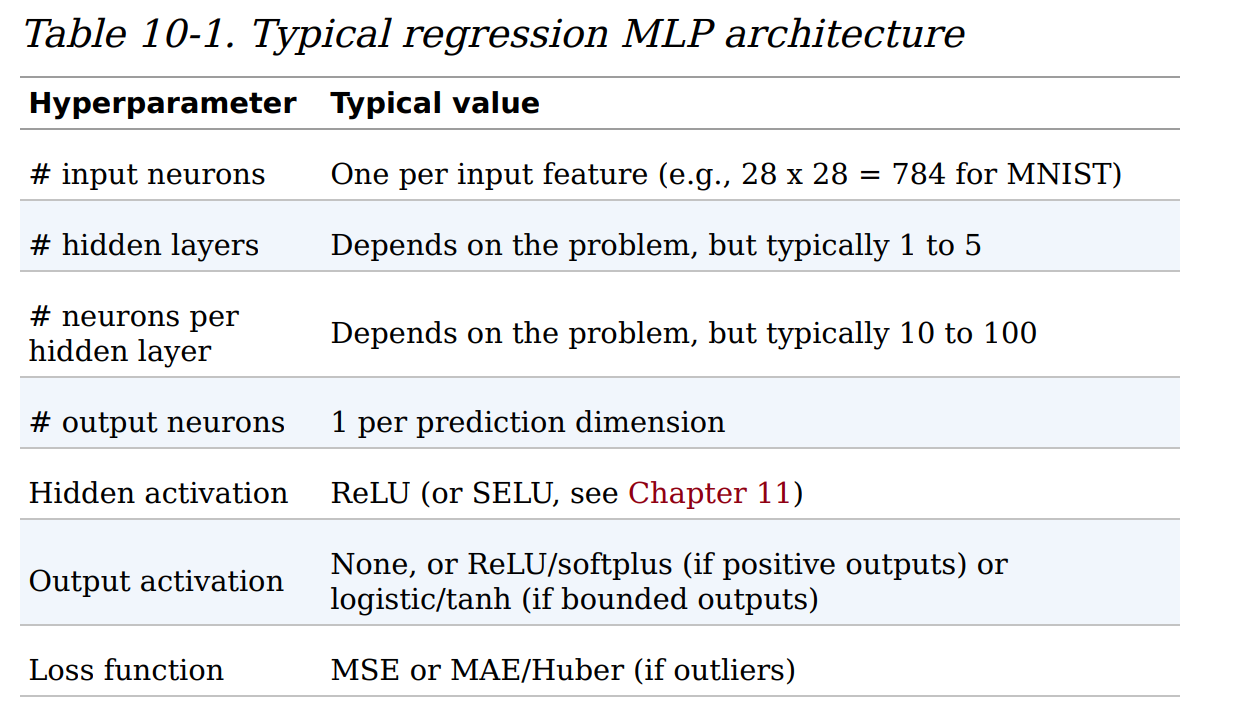

# Classification MLPs
For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the
estimated probability of the positive class. 

If each instance can belong only to a single class, out of three
or more possible classes (e.g., classes 0 through 9 for digit
image classification), then you need to have one output
neuron per class, and you should use the softmax activation
function for the whole output layer (see Figure 10-9). The
softmax function (introduced in Chapter 4) will ensure that all
the estimated probabilities are between 0 and 1 and that they
add up to 1 (which is required if the classes are exclusive).
This is called multiclass classification.

Regarding the loss function, since we are predicting
probability distributions, the cross-entropy loss (also called
the log loss.

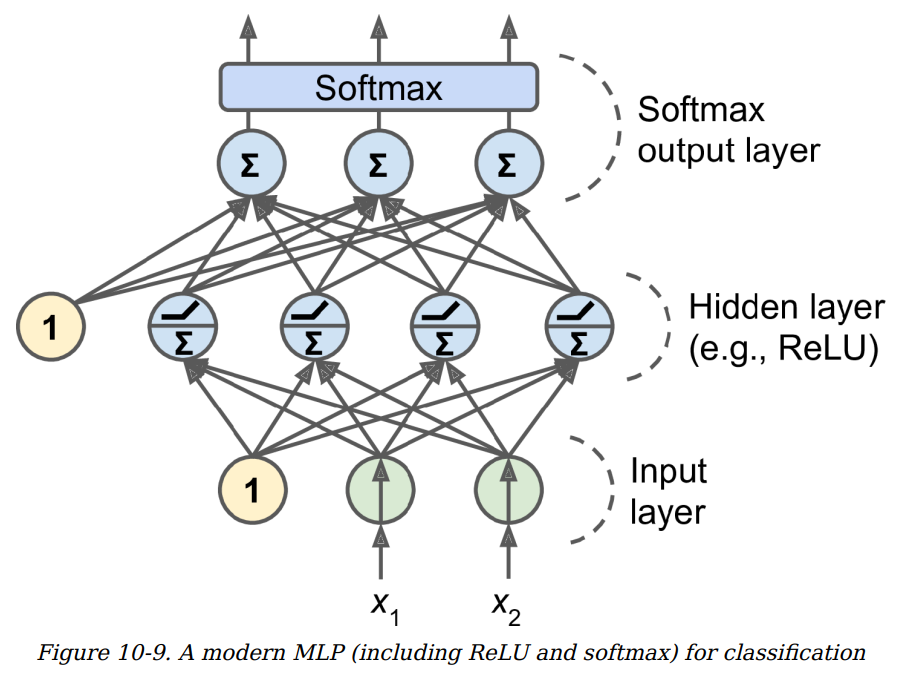

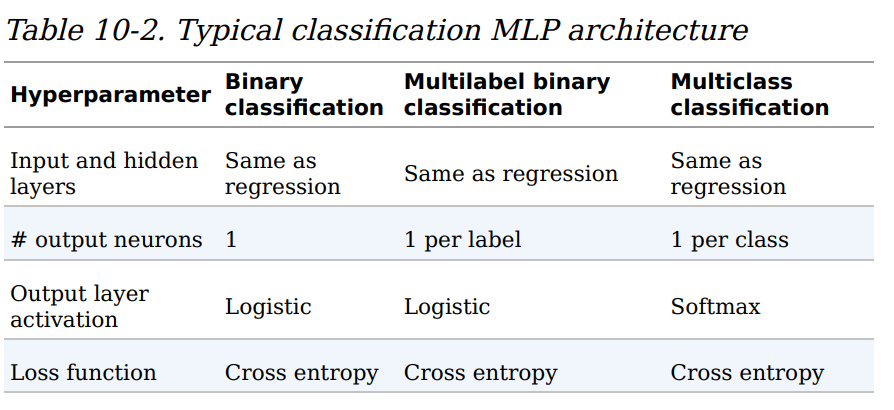

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Everyimage is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).

In [7]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
# Scale the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:
1. The first line creates a Sequential model. This is the
simplest kind of Keras model for neural networks that
are just composed of a single stack of layers connected
sequentially. This is called the Sequential API.
2. Next, we build the first layer and add it to the model. It
is a Flatten layer whose role is to convert each input
image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 1). This layer does not have
any parameters; it is just there to do some simple
preprocessing. Since it is the first layer in the model,
you should specify the input_shape, which doesn’t
include the batch size, only the shape of the instances.Alternatively, you could add a keras.layers.InputLayer as
the first layer, setting input_shape=[28,28].
3. Next we add a Dense hidden layer with 300 neurons. It
will use the ReLU activation function. Each Dense layer
manages its own weight matrix, containing all the
connection weights between the neurons and their
inputs. It also manages a vector of bias terms (one per
neuron). When it receives some input data, it computes.
4. Then we add a second Dense hidden layer with 100
neurons, also using the ReLU activation function.
5. Finally, we add a Dense output layer with 10 neurons
(one per class), using the softmax activation function
(because the classes are exclusive).

In [12]:
# Instead of adding the layers one by one as we just did, you
# can pass a list of layers when creating the Sequential model:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
# The model’s summary() method displays all the model’s layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The summary ends with the total number of parameters, including trainable and non-trainable parameters.

The first hidden layer has 784 × 300 connection
weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the
risk of overfitting, especially when you do not have a lot of training data.

In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.03026684,  0.00725095, -0.03842704, ...,  0.05109565,
         0.02839295, -0.02554661],
       [-0.02953427, -0.06341139,  0.0184843 , ..., -0.04124321,
         0.04094294,  0.05337991],
       [ 0.02564488,  0.03994086, -0.07057256, ...,  0.04012375,
         0.04892607, -0.00047092],
       ...,
       [-0.07394489, -0.02924397, -0.01631428, ..., -0.06182073,
        -0.06762594,  0.0720811 ],
       [-0.01255549, -0.06360718,  0.04388702, ..., -0.05762754,
        -0.02723073,  0.01464251],
       [ 0.0404367 ,  0.01416962, -0.00976939, ..., -0.02374715,
         0.0585479 , -0.03867044]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

Notice that the Dense layer initialized the connection weights
randomly (which is needed to break symmetry, as we
discussed earlier), and the biases were initialized to zeros,
which is fine. If you ever want to use a different initialization
method, you can set kernel_initializer (kernel is another
name for the matrix of connection weights) or bias_initializer
when creating the layer.

*The shape of the weight matrix depends on the number of inputs. This is
why it is recommended to specify the input_shape when creating the first
layer in a Sequential model. However, if you do not specify the input
shape, it’s OK: Keras will simply wait until it knows the input shape
before it actually builds the model. This will happen either when you
feed it actual data (e.g., during training), or when you call its build()
method. Until the model is really built, the layers will not have any
weights, and you will not be able to do certain things (such as print the
model summary or save the model). So, if you know the input shape
when creating the model, it is best to specify it.*

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally,you can specify a list of extra metrics to compute during
training and evaluation:

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

*Using 'loss="sparse_categorical_crossentropy"' is equivalent to using
`loss=keras.losses.sparse_categorical_crossentropy`. Similarly, specifying
`optimizer="sgd"` is equivalent to specifying
`optimizer=keras.optimizers.SGD()`, and `metrics=["accuracy"]` is equivalent to
`metrics=[keras.metrics.sparse_categorical_accuracy]` (when using this
loss). *

*If you want to convert sparse labels (i.e., class indices) to one-hot vector
labels, use the `keras.utils.to_categorical()` function. To go the other way
round, use the `np.argmax()` function with `axis=1`.*

*When using the SGD optimizer, it is important to tune the learning rate.
So, you will generally want to use `optimizer=keras.optimizers.SGD(lr=???)`
to set the learning rate, rather than `optimizer="sgd"`, which defaults to
`lr=0.01`.*

In [23]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7350 - accuracy: 0.7571 - val_loss: 0.5070 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4875 - accuracy: 0.8314 - val_loss: 0.4584 - val_accuracy: 0.8448
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4396 - accuracy: 0.8468 - val_loss: 0.4240 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4142 - accuracy: 0.8553 - val_loss: 0.4087 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8619 - val_loss: 0.4030 - val_accuracy: 0.8608
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8661 - val_loss: 0.3816 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3658 - accuracy: 0.8708 - val_loss: 0.3615 - val_accuracy:

*Instead of passing a validation set using the `validation_data` argument, you could set `validation_split` to the ratio of the training set that you want Keras to use for validation. For example, `validation_split=0.1` tells Keras to use the last 10% of the data (before shuffling) for validation.*

*If the training set was very skewed, with some classes being
overrepresented and others underrepresented, it would be
useful to set the `class_weight` argument when calling the `fit()` method, which would give a larger weight to
underrepresented classes and a lower weight to
overrepresented classes*.

These weights would be used by Keras when computing the loss. If you need per-instance weights, set the `sample_weight` argument (it supersedes 15class_weight). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.
The `fit()` method returns a `History` object containing the
training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary
(`history.history`) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on
the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its `plot()` method, you get the learning curves.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

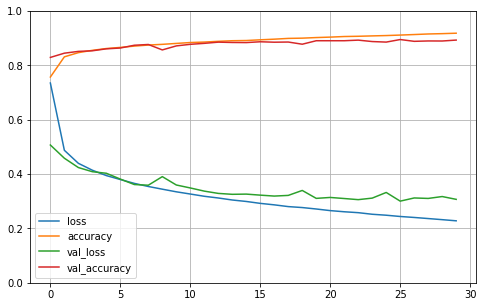

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

*When plotting the training curve, it should be shifted by half an epoch to
the left.*

 You can tell that the model has not quite converged
yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the `fit()` method again, since Keras just continues training where it left off.

If you are not satisfied with the performance of your model,
you should go back and tune the hyperparameters. The first
one to check is the learning rate. If that doesn’t help, try
another optimizer (and always retune the learning rate after
changing any hyperparameter). If the performance is still not
great, then try tuning model hyperparameters such as the
number of layers, the number of neurons per layer, and the
types of activation functions to use for each hidden layer. You
can also try tuning other hyperparameters, such as the batch
size (it can be set in the fit() method using the batch_size
argument, which defaults to 32).

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 65.6109 - accuracy: 0.8428


[65.61091613769531, 0.8428000211715698]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [30]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

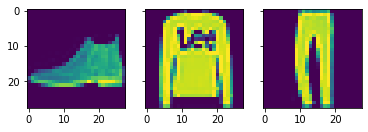

In [36]:
fig, axes = plt.subplots(ncols=3, sharey=True)

plt.sca(axes[0])
plt.imshow(X_new[0], interpolation='nearest')

plt.sca(axes[1])
plt.imshow(X_new[1], interpolation='nearest')

plt.sca(axes[2])
plt.imshow(X_new[2], interpolation='nearest')

plt.show()

# Building a Regression MLP Using the Sequential API
The main differences are the fact
that the output layer has a single neuron (since we only want
to predict a single value) and uses no activation function, and
the loss function is the mean squared error. Since the dataset
is quite noisy, we just use a single hidden layer with fewer
neurons than before, to avoid overfitting

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
housing = fetch_california_housing()

In [40]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
model = keras.models.Sequential([
      keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
      keras.layers.Dense(1)  # output layer
])

In [43]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [44]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9306 - val_loss: 0.6085
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6290 - val_loss: 0.5112
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5448 - val_loss: 0.4901
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4687 - val_loss: 0.4718
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4543 - val_loss: 0.4568
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4490 - val_loss: 0.4546
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4361 - val_loss: 0.4404
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4305 - val_loss: 0.4381
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4209 - val_loss: 0.4305
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4140 - val_loss: 0.4248

In [45]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 900us/step - loss: 0.3823


In [47]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.8143685 ],
       [0.94058424],
       [1.6163923 ]], dtype=float32)

# Building Complex Models Using the Functional API
One example of a  nonsequential neural network is a Wide & Deep neural network. 

It
connects all or part of the inputs directly to the output layer,
as shown in Figure 10-14. This architecture makes it possible
for the neural network to learn both deep patterns (using the
deep path) and simple rules (through the short path). In
contrast, a regular MLP forces all the data to flow through the
full stack of layers; thus, simple patterns in the data may end
up being distorted by this sequence of transformations.

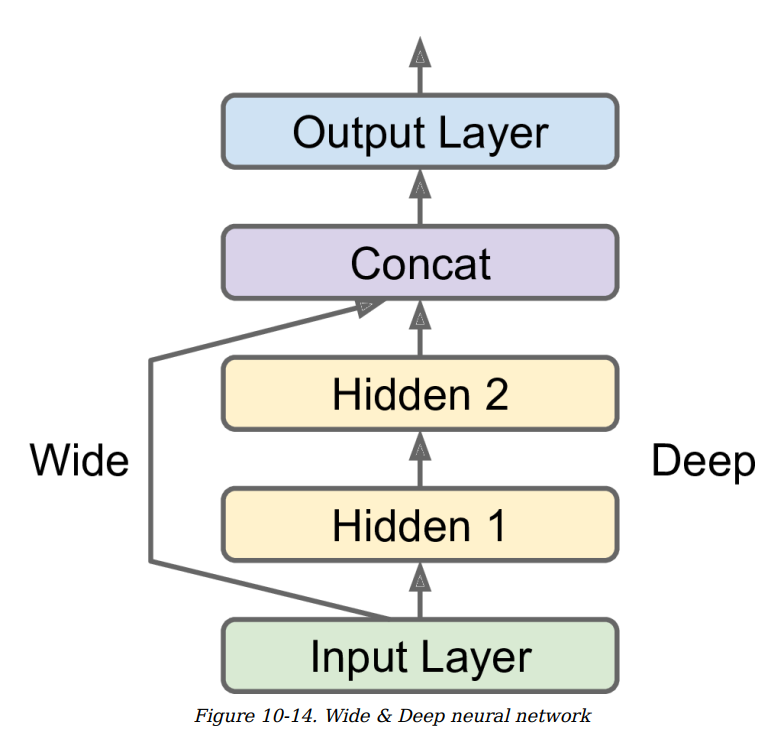

In [49]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Let’s go through each line of this code:
1. First, we need to create an Input object. This is a
specification of the kind of input the model will get,
including its shape and dtype. A model may actually
have multiple inputs, as we will see shortly.
2. Next, we create a Dense layer with 30 neurons, using
the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API.
Note that we are just telling Keras how it should
connect the layers together; no actual data is being
processed yet.
3. We then create a second hidden layer, and again we
use it as a function. Note that we pass it the output of
the first hidden layer.
4. Next, we create a Concatenate layer, and once again we
immediately use it like a function, to concatenate the
input and the output of the second hidden layer. You
may prefer the keras.layers.concatenate() function,
which creates a Concatenate layer and immediately calls
it with the given inputs.
5. Then we create the output layer, with a single neuron
and no activation function, and we call it like a
function, passing it the result of the concatenation.
6. Lastly, we create a Keras 
Model, specifying which inputs
and outputs to use.

But what if you want to send a subset of the features through
the wide path and a different subset (possibly overlapping)
through the deep path (see Figure 10-15)? In this case, one
solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0
to 4), and six features through the deep path.

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

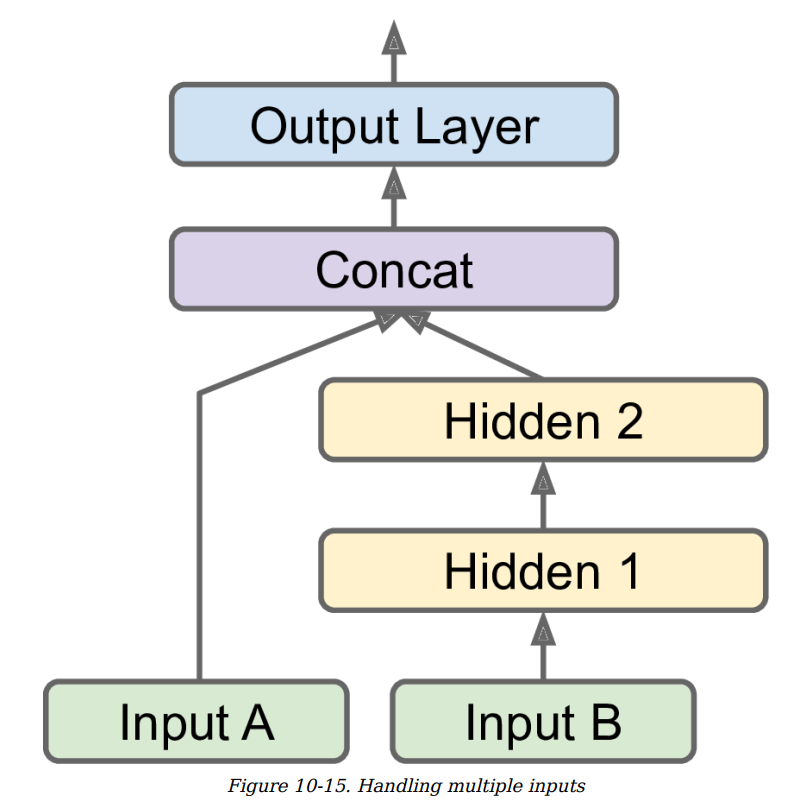

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [53]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [54]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0572 - val_loss: 0.9858
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8416 - val_loss: 0.7789
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7206 - val_loss: 0.7245
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6777 - val_loss: 0.6867
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6448 - val_loss: 0.6684
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6271 - val_loss: 0.6441
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6063 - val_loss: 0.6266
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.6097
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5767 - val_loss: 0.5977
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5675 - val_loss: 0.5874

In [55]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5067


In [56]:
y_pred = model.predict((X_new_A, X_new_B))

There are many use cases in which you may want to have
multiple outputs:
1. The task may demand it. For instance, you may want to
locate and classify the main object in a picture. This is
both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
2. Similarly, you may have multiple independent tasks
based on the same data. Sure, you could train one
neural network per task, but in many cases you will get
better results on all tasks by training a single neural
network with one output per task. This is because the
neural network can learn features in the data that are
useful across tasks. For example, you could perform
multitask classification on pictures of faces, using one
19output to classify the person’s facial expression
(smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.
3. Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce
overfitting and thus improve the model’s ability to
generalize). For example, you may want to add some
auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without
relying on the rest of the network.

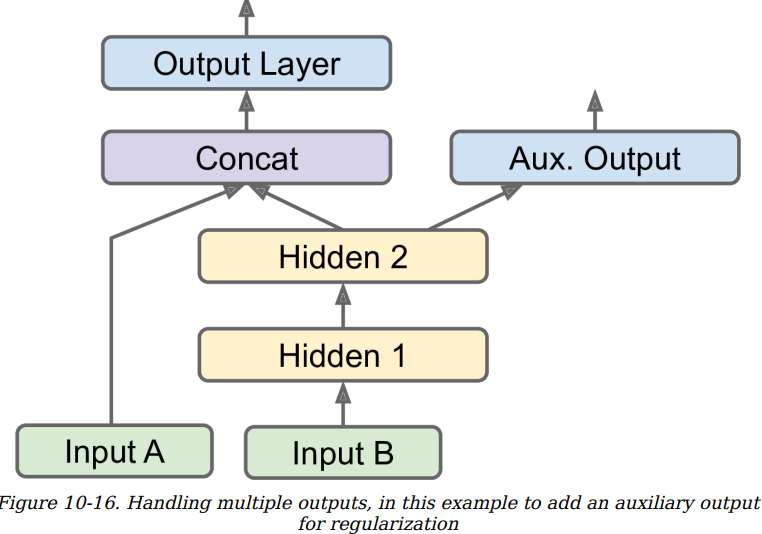

In [57]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [58]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training.

In [59]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Now when we train the model, we need to provide labels for
each output.

In [60]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8184 - main_output_loss: 0.7514 - aux_output_loss: 1.4216 - val_loss: 0.6010 - val_main_output_loss: 0.5374 - val_aux_output_loss: 1.1736
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5783 - main_output_loss: 0.5242 - aux_output_loss: 1.0646 - val_loss: 0.5524 - val_main_output_loss: 0.5012 - val_aux_output_loss: 1.0138
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5444 - main_output_loss: 0.5001 - aux_output_loss: 0.9429 - val_loss: 0.5401 - val_main_output_loss: 0.4986 - val_aux_output_loss: 0.9136
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5490 - main_output_loss: 0.5138 - aux_output_loss: 0.8665 - val_loss: 0.5301 - val_main_output_loss: 0.4932 - val_aux_output_loss: 0.8621
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5016 - main_output_loss: 0.4696 - aux_output_loss: 0.7898 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [61]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3621 - main_output_loss: 0.3490 - aux_output_loss: 0.4807


In [62]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# Using the Subclassing API to Build Dynamic Models
Both the Sequential API and the Functional API are
declarative: you start by declaring which layers you want to
use and how they should be connected, and only then can you
start feeding the model some data for training or inference.
This has many advantages: the model can easily be saved,
cloned, and shared; its structure can be displayed and
analyzed; the framework can infer shapes and check types, so
errors can be caught early (i.e., before any data ever goes
through the model). It’s also fairly easy to debug, since the
whole model is a static graph of layers. But the flip side is just
that: it’s static. Some models involve loops, varying shapes,
conditional branching, and other dynamic behaviors. For such
cases, or simply if you prefer a more imperative programming
style, the Subclassing API is for you